In [4]:
#load the dataset
import pandas
import csv
df = pandas.read_csv(r"titanic.csv")
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class   
0           0       3    male  22.0      1      0   7.2500        S   Third  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

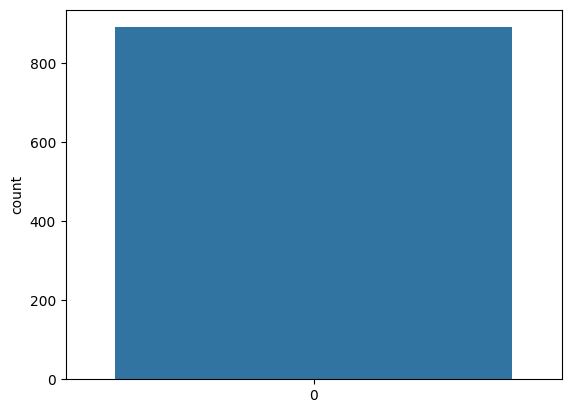

C:\Users\megha\AppData\Local\Temp\ipykernel_14676\2167218152.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


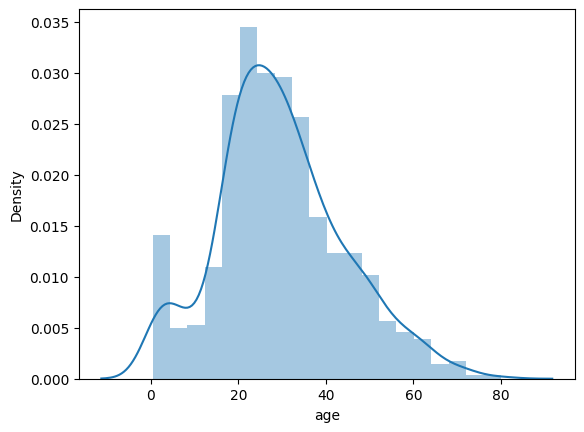

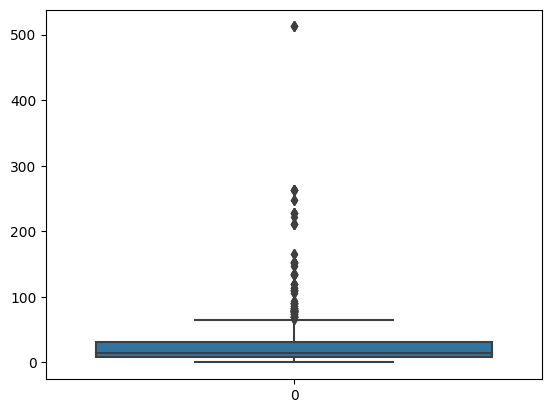

In [13]:
import matplotlib.pyplot as plt
sns.countplot(df['survived'])
plt.show()
sns.distplot(df['age'])
plt.show()
sns.boxplot(df['fare'])
plt.show()

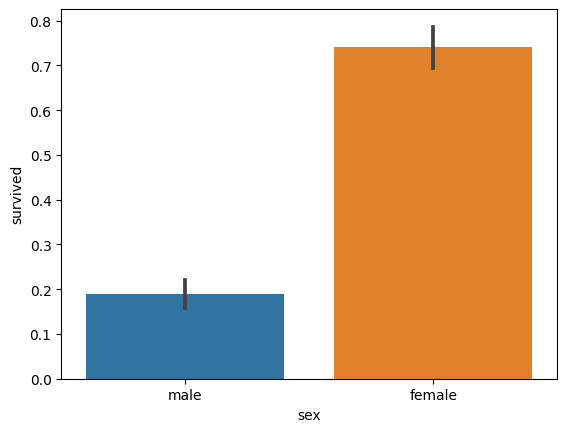

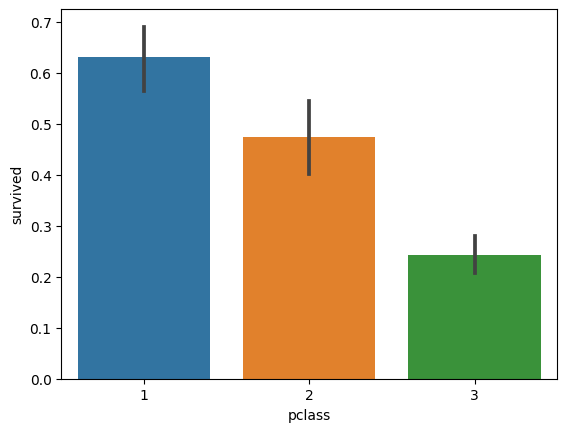

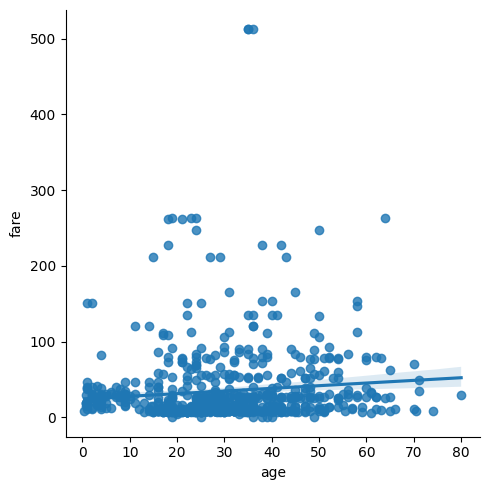

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


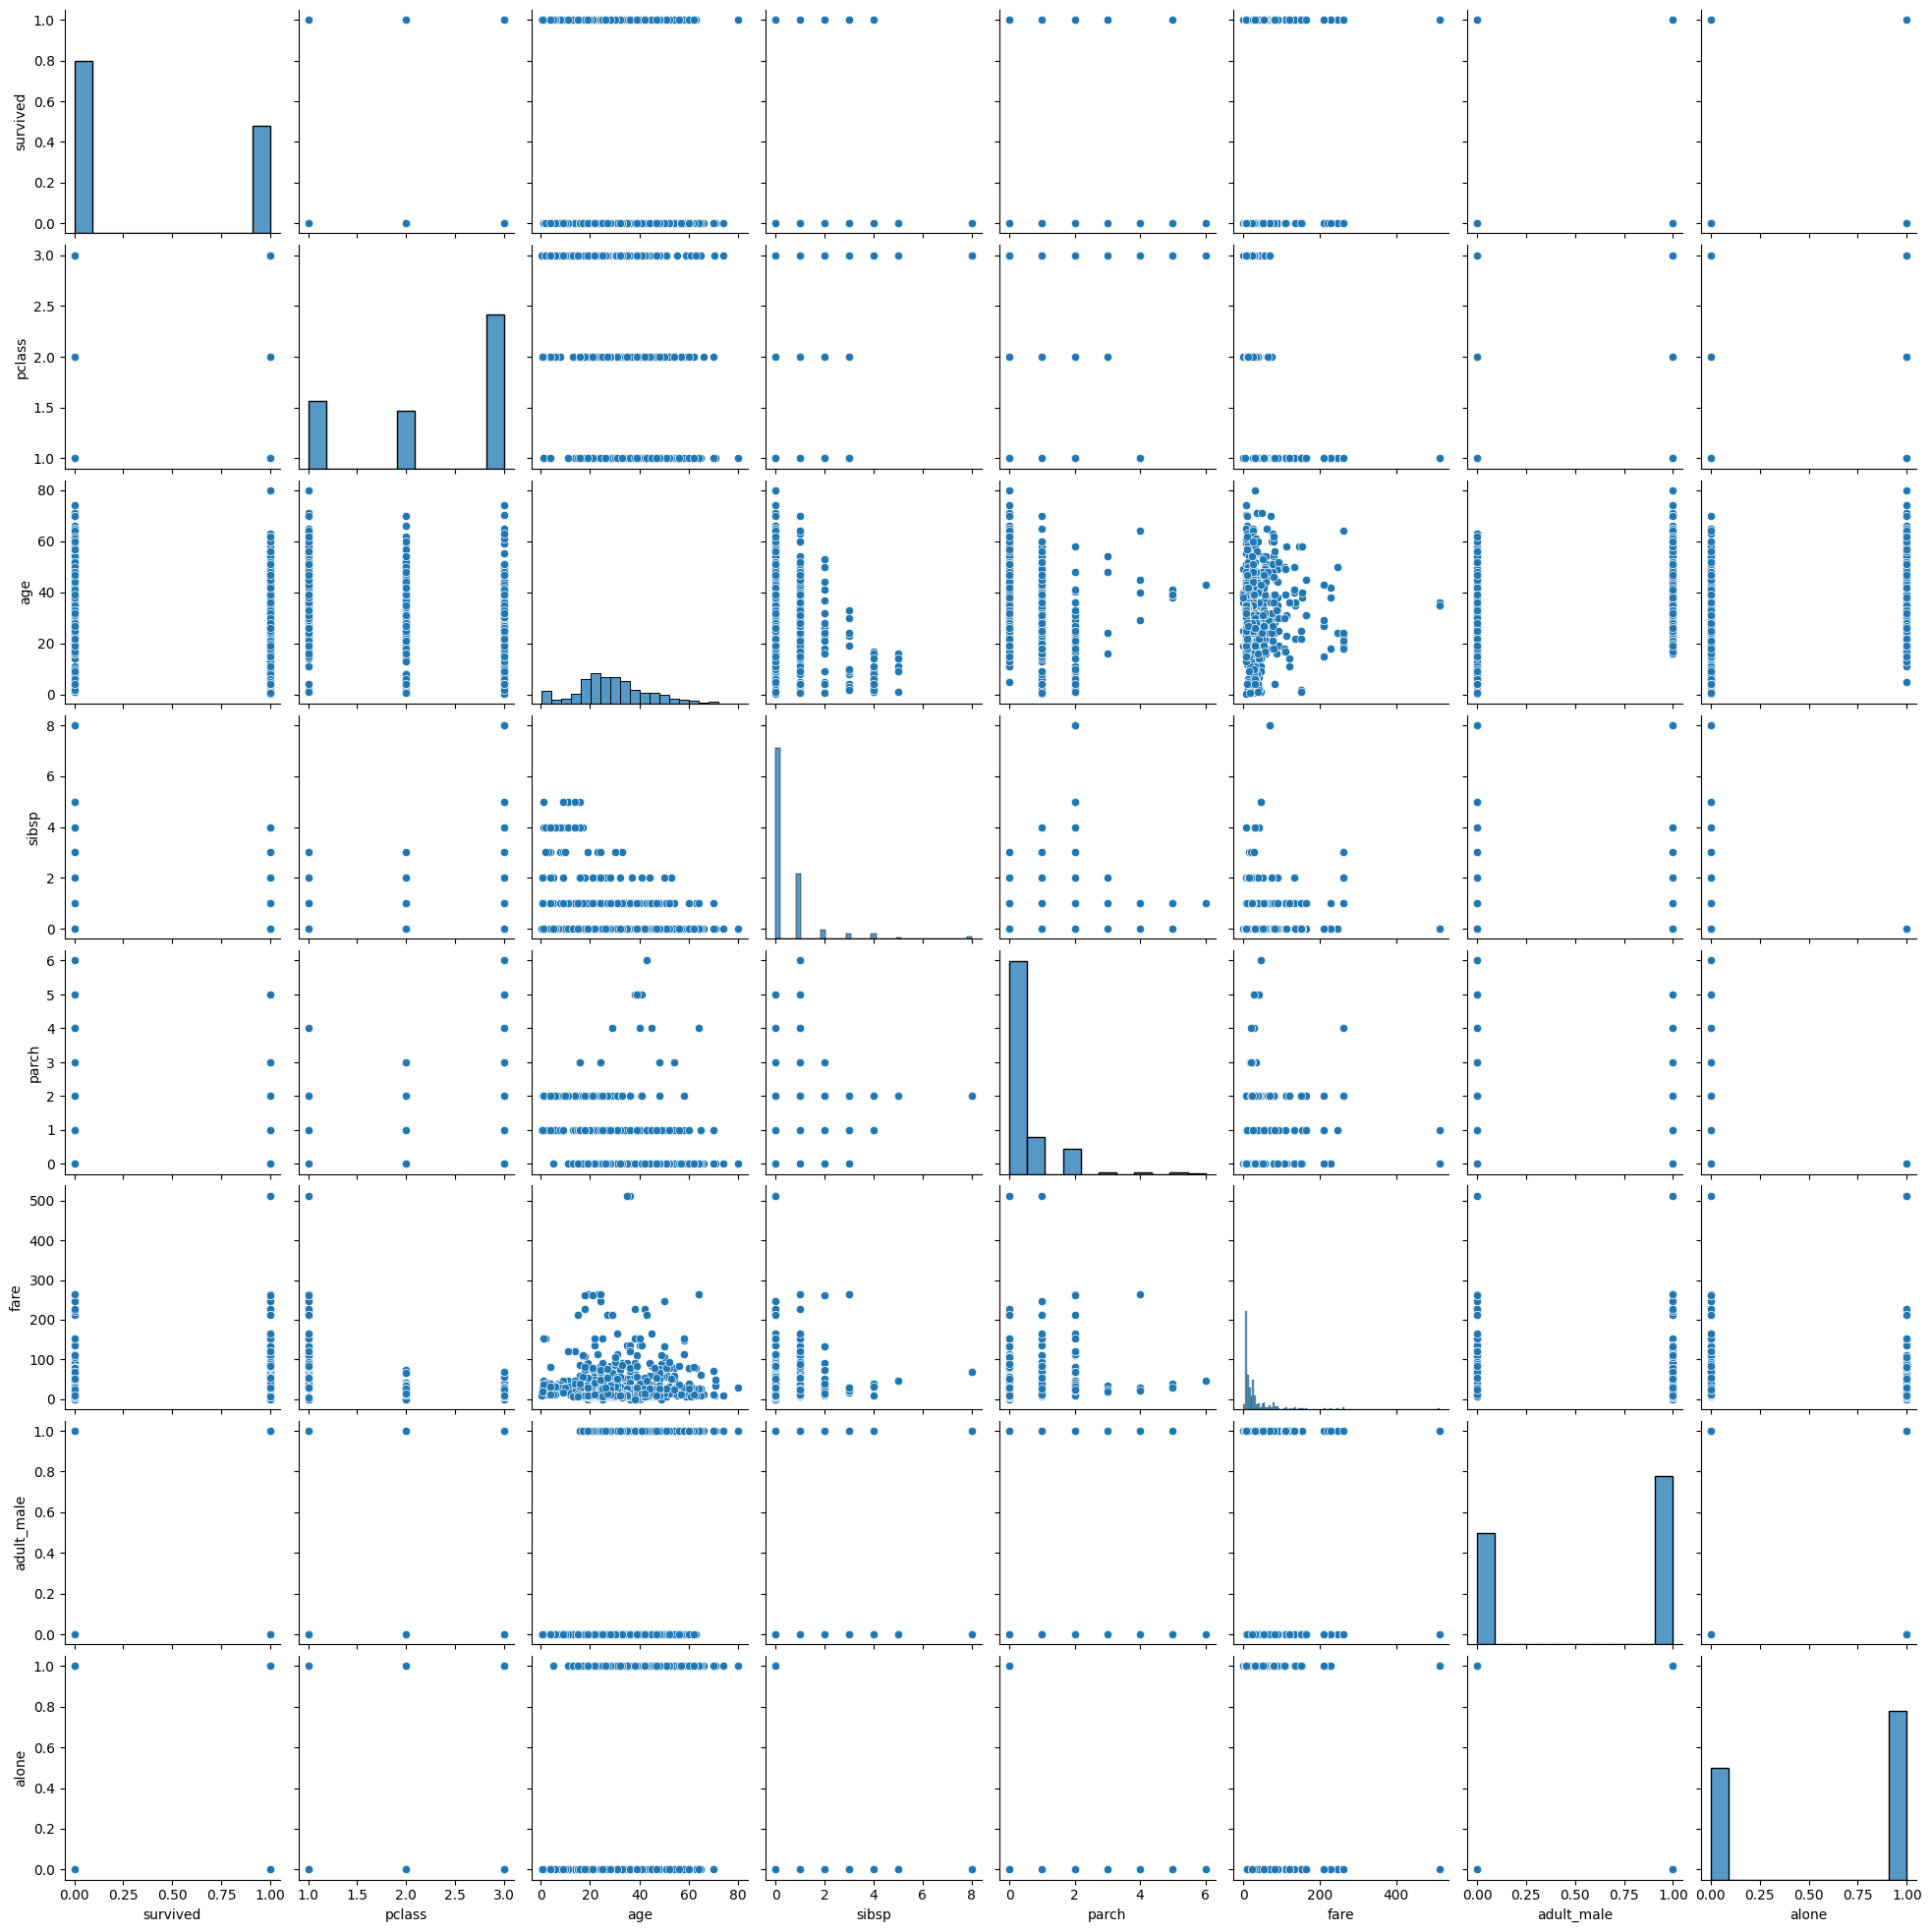

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [14]:
#bivariate analysis, multivariate analysis,Perform descriptive statistics on the dataset.
sns.barplot(x='sex', y='survived', data=df)
plt.show()
sns.barplot(x='pclass', y='survived', data=df)
plt.show()
sns.lmplot(x='age', y='fare', data=df)
plt.show()
sns.pairplot(df)
plt.show()
df.describe()

In [18]:
#Handle the Missing values
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

In [19]:
#Find the outliers and replace the outliers
df = df[df['age'] < 80]
df = df[df['fare'] < 1000]

In [20]:
#Check for Categorical columns and perform encoding.
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [21]:
#Split the data into dependent and independent variables.
X = df.drop('survived', axis=1)
y = df['survived']

In [22]:
# Scale the independent variables
df.dropna(subset=['age', 'embarked'], inplace=True)

In [32]:
#Split the data into training and testing
import numpy as np
lower_bound=10
upper_bound=100
df['fare'] = np.where((df['fare'] < lower_bound) | (df['fare'] > upper_bound), df['fare'].median(), df['fare'])

In [24]:
categorical_cols = ['sex', 'embarked']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [27]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']
